In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sys
import matplotlib.pyplot as plt


In [29]:
table_scan_data = pd.read_csv("data/TableScan_train.csv")
columns_data = pd.read_csv("data/table_meta_train.csv")
table_data = pd.read_csv("data/column_meta_train.csv")

joined_data = table_scan_data.merge(table_data, on=["TABLE_NAME", "COLUMN_NAME"], how="left")

joined_data = joined_data.merge(columns_data, on="TABLE_NAME", how="left")
joined_data = joined_data.rename(columns={"INPUT_ROWS_LEFT": "INPUT_ROWS", "CHUNK_SIZE": "MAX_CHUNK_SIZE",
                                          "COLUMN_DATA_TYPE": "DATA_TYPE", "ENCODING_TYPE": "ENCODING",
                                          "TABLE_NAME": "TABLE_NAME", "COLUMN_NAME": "COLUMN_NAME",
                                          "COLUMN_DATA_TYPE": "DATA_TYPE", "COLUMN_TYPE": "SCAN_TYPE"})

joined_data

,INPUT_ROWS,OUTPUT_ROWS,RUNTIME_NS,SCAN_TYPE,TABLE_NAME,COLUMN_NAME,DATA_TYPE,ENCODING,ROW_COUNT,MAX_CHUNK_SIZE
0,100,99,219760,COLUMN_SCAN,_cmc_1000_100,int_Unencoded_Uniform_0_1000,int,Unencoded,100,1000
1,100,89,101887,COLUMN_SCAN,_cmc_1000_100,int_Unencoded_Uniform_0_1000,int,Unencoded,100,1000
2,100,80,100212,COLUMN_SCAN,_cmc_1000_100,int_Unencoded_Uniform_0_1000,int,Unencoded,100,1000
3,100,75,99780,COLUMN_SCAN,_cmc_1000_100,int_Unencoded_Uniform_0_1000,int,Unencoded,100,1000
4,100,57,97060,COLUMN_SCAN,_cmc_1000_100,int_Unencoded_Uniform_0_1000,int,Unencoded,100,1000
...,...,...,...,...,...,...,...,...,...,...
2491,1000000,0,341063795,COLUMN_SCAN,_cmc_1000_1000000,string_Unencoded_Uniform_0_1000,string,Unencoded,1000000,1000
2492,1000000,0,8090658,COLUMN_SCAN,_cmc_1000_1000000,string_Dictionary_Uniform_0_1000,string,Dictionary,1000000,1000
2493,1000000,0,399201845,COLUMN_SCAN,_cmc_1000_1000000,string_RunLength_Uniform_0_1000,string,RunLength,1000000,1000
2494,1000000,0,7923949,COLUMN_SCAN,_cmc_1000_1000000,string_FixedStringDictionary_Uniform_0_1000,string,FixedStringDictionary,1000000,1000


In [64]:
joined_data.describe()

,INPUT_ROWS,OUTPUT_ROWS,RUNTIME_NS,ROW_COUNT,MAX_CHUNK_SIZE
count,2496.000000,2496.000000,2.496000e+03,2496.000000,2496.0
mean,423930.769231,206239.327724,1.060082e+08,423930.769231,1000.0
std,341307.764522,241239.332189,9.748735e+07,341307.764522,0.0
min,100.000000,0.000000,3.603900e+04,100.000000,1000.0
25%,100000.000000,998.000000,6.044304e+06,100000.000000,1000.0
50%,400000.000000,100607.500000,9.068484e+07,400000.000000,1000.0
75%,700000.000000,349344.500000,1.777694e+08,700000.000000,1000.0
max,1000000.000000,998540.000000,9.655402e+08,1000000.000000,1000.0


In [58]:
ohe_data = joined_data.drop(labels=['TABLE_NAME', 'COLUMN_NAME'], axis=1)
ohe_data['SELECTIVITY'] = (ohe_data['OUTPUT_ROWS'])/(ohe_data['INPUT_ROWS'])
ohe_data = pd.get_dummies(ohe_data, columns=['SCAN_TYPE', 'DATA_TYPE', 'ENCODING'])
ohe_data.head()

,INPUT_ROWS,OUTPUT_ROWS,RUNTIME_NS,ROW_COUNT,MAX_CHUNK_SIZE,SELECTIVITY,SCAN_TYPE_COLUMN_SCAN,DATA_TYPE_double,DATA_TYPE_float,DATA_TYPE_int,DATA_TYPE_long,DATA_TYPE_string,ENCODING_Dictionary,ENCODING_FixedStringDictionary,ENCODING_FrameOfReference,ENCODING_LZ4,ENCODING_RunLength,ENCODING_Unencoded
0,100,99,219760,100,1000,0.99,1,0,0,1,0,0,0,0,0,0,0,1
1,100,89,101887,100,1000,0.89,1,0,0,1,0,0,0,0,0,0,0,1
2,100,80,100212,100,1000,0.80,1,0,0,1,0,0,0,0,0,0,0,1
3,100,75,99780,100,1000,0.75,1,0,0,1,0,0,0,0,0,0,0,1
4,100,57,97060,100,1000,0.57,1,0,0,1,0,0,0,0,0,0,0,1


In [65]:
ohe_data.describe()

,INPUT_ROWS,OUTPUT_ROWS,RUNTIME_NS,ROW_COUNT,MAX_CHUNK_SIZE,SELECTIVITY,SCAN_TYPE_COLUMN_SCAN,DATA_TYPE_double,DATA_TYPE_float,DATA_TYPE_int,DATA_TYPE_long,DATA_TYPE_string,ENCODING_Dictionary,ENCODING_FixedStringDictionary,ENCODING_FrameOfReference,ENCODING_LZ4,ENCODING_RunLength,ENCODING_Unencoded
count,2496.000000,2496.000000,2.496000e+03,2496.000000,2496.0,2496.000000,2496.0,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000
mean,423930.769231,206239.327724,1.060082e+08,423930.769231,1000.0,0.484858,1.0,0.229167,0.229167,0.286458,0.229167,0.026042,0.234375,0.005208,0.057292,0.234375,0.234375,0.234375
std,341307.764522,241239.332189,9.748735e+07,341307.764522,0.0,0.321220,0.0,0.420381,0.420381,0.452197,0.420381,0.159291,0.423692,0.071995,0.232446,0.423692,0.423692,0.423692
min,100.000000,0.000000,3.603900e+04,100.000000,1000.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100000.000000,998.000000,6.044304e+06,100000.000000,1000.0,0.200201,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,400000.000000,100607.500000,9.068484e+07,400000.000000,1000.0,0.499102,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,700000.000000,349344.500000,1.777694e+08,700000.000000,1000.0,0.798131,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,998540.000000,9.655402e+08,1000000.000000,1000.0,0.999000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


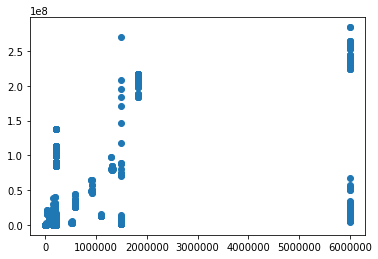

In [31]:
plt.scatter(ohe_data['INPUT_ROWS'],ohe_data['RUNTIME_NS'])

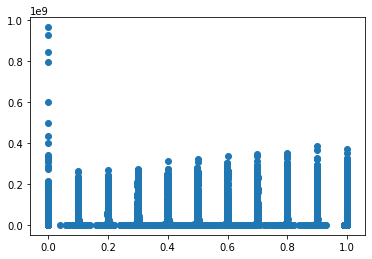

In [67]:
plt.scatter(ohe_data['SELECTIVITY'],ohe_data['RUNTIME_NS'])

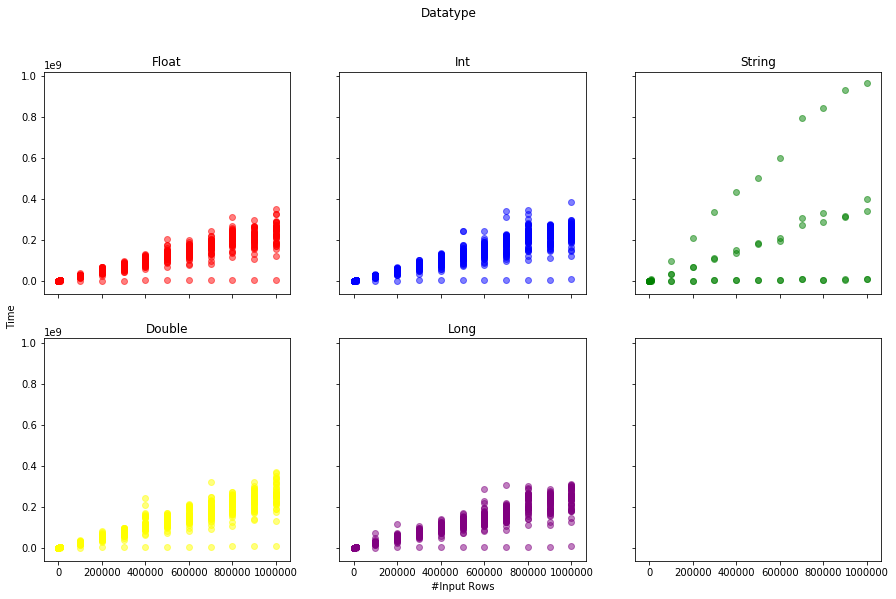

In [54]:
# looking at impact of the datatype

floats = ohe_data.loc[ohe_data['DATA_TYPE_float'] == 1]
ints = ohe_data.loc[ohe_data['DATA_TYPE_int'] == 1]
strings = ohe_data.loc[ohe_data['DATA_TYPE_string'] == 1]
longs = ohe_data.loc[ohe_data['DATA_TYPE_long'] == 1]
doubles = ohe_data.loc[ohe_data['DATA_TYPE_double'] == 1]

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15,9))
fig.suptitle('Datatype')
axs[0,0].scatter(floats['INPUT_ROWS'], floats['RUNTIME_NS'], color='r', alpha=0.5)
axs[0, 0].set_title('Float')
axs[0,1].scatter(ints['INPUT_ROWS'], ints['RUNTIME_NS'], color='b', alpha=0.5)
axs[0, 1].set_title('Int')
axs[0,2].scatter(strings['INPUT_ROWS'], strings['RUNTIME_NS'], color='g', alpha=0.5)
axs[0, 2].set_title('String')
axs[1,0].scatter(doubles['INPUT_ROWS'], doubles['RUNTIME_NS'], color='yellow',alpha=0.5)
axs[1,0].set_title('Double')
axs[1,1].scatter(longs['INPUT_ROWS'], longs['RUNTIME_NS'], color='purple', alpha=0.5)
axs[1,1].set_title('Long')

# for labels
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("#Input Rows")
plt.ylabel("Time")
plt.show()

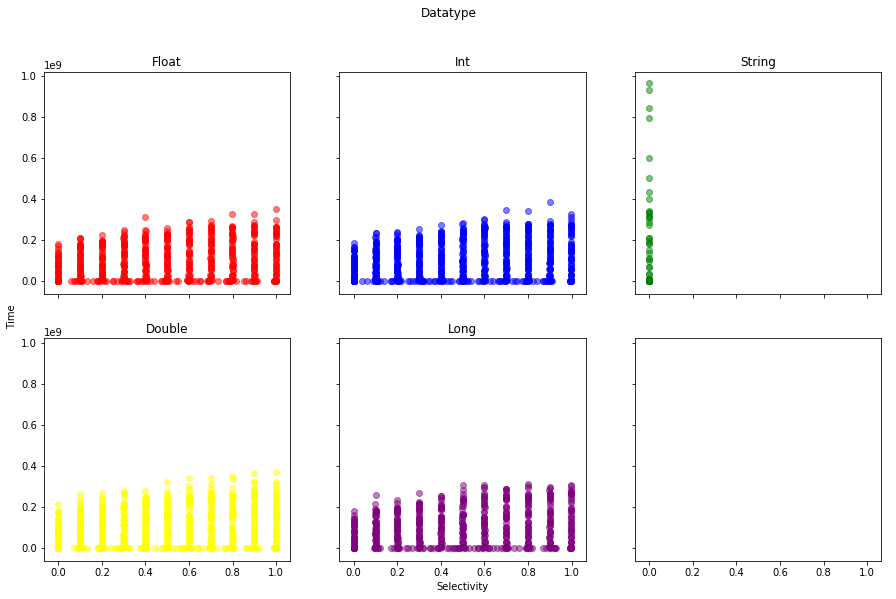

In [59]:
# looking at impact of the datatype

floats = ohe_data.loc[ohe_data['DATA_TYPE_float'] == 1]
ints = ohe_data.loc[ohe_data['DATA_TYPE_int'] == 1]
strings = ohe_data.loc[ohe_data['DATA_TYPE_string'] == 1]
longs = ohe_data.loc[ohe_data['DATA_TYPE_long'] == 1]
doubles = ohe_data.loc[ohe_data['DATA_TYPE_double'] == 1]

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15,9))
fig.suptitle('Datatype')
axs[0,0].scatter(floats['SELECTIVITY'], floats['RUNTIME_NS'], color='r', alpha=0.5)
axs[0, 0].set_title('Float')
axs[0,1].scatter(ints['SELECTIVITY'], ints['RUNTIME_NS'], color='b', alpha=0.5)
axs[0, 1].set_title('Int')
axs[0,2].scatter(strings['SELECTIVITY'], strings['RUNTIME_NS'], color='g', alpha=0.5)
axs[0, 2].set_title('String')
axs[1,0].scatter(doubles['SELECTIVITY'], doubles['RUNTIME_NS'], color='yellow',alpha=0.5)
axs[1,0].set_title('Double')
axs[1,1].scatter(longs['SELECTIVITY'], longs['RUNTIME_NS'], color='purple', alpha=0.5)
axs[1,1].set_title('Long')

# for labels
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Selectivity")
plt.ylabel("Time")
plt.show()

In [38]:
# looks like strings can take way longer than the other datatypes

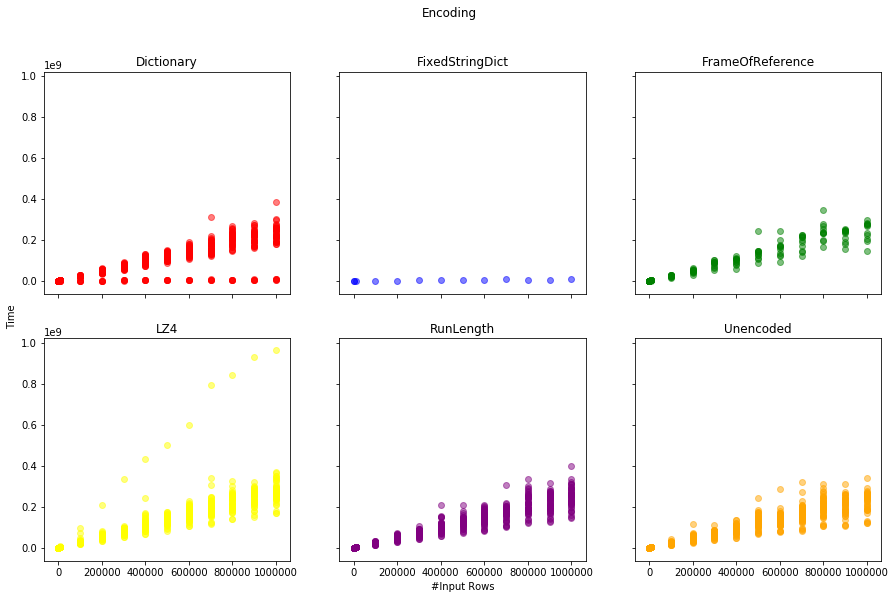

In [53]:
# looking at impact of the datatype

dicts = ohe_data.loc[ohe_data['ENCODING_Dictionary'] == 1]
fsdicts = ohe_data.loc[ohe_data['ENCODING_FixedStringDictionary'] == 1]
forefs = ohe_data.loc[ohe_data['ENCODING_FrameOfReference'] == 1]
lz4s = ohe_data.loc[ohe_data['ENCODING_LZ4'] == 1]
runls = ohe_data.loc[ohe_data['ENCODING_RunLength'] == 1]
noencs = ohe_data.loc[ohe_data['ENCODING_Unencoded'] == 1]

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15,9))
#ax=fig.add_axes([0,0,1,1])
fig.suptitle('Encoding')
axs[0,0].scatter(dicts['INPUT_ROWS'], dicts['RUNTIME_NS'], color='r', alpha=0.5)
axs[0, 0].set_title('Dictionary')
axs[0,1].scatter(fsdicts['INPUT_ROWS'], fsdicts['RUNTIME_NS'], color='b', alpha=0.5)
axs[0, 1].set_title('FixedStringDict')
axs[0,2].scatter(forefs['INPUT_ROWS'], forefs['RUNTIME_NS'], color='g', alpha=0.5)
axs[0, 2].set_title('FrameOfReference')
axs[1,0].scatter(lz4s['INPUT_ROWS'], lz4s['RUNTIME_NS'], color='yellow',alpha=0.5)
axs[1, 0].set_title('LZ4')
axs[1,1].scatter(runls['INPUT_ROWS'], runls['RUNTIME_NS'], color='purple', alpha=0.5)
axs[1, 1].set_title('RunLength')
axs[1,2].scatter(noencs['INPUT_ROWS'], noencs['RUNTIME_NS'], color='orange',alpha=0.5)
axs[1, 2].set_title('Unencoded')

# for labels
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("#Input Rows")
plt.ylabel("Time")
    
plt.show()


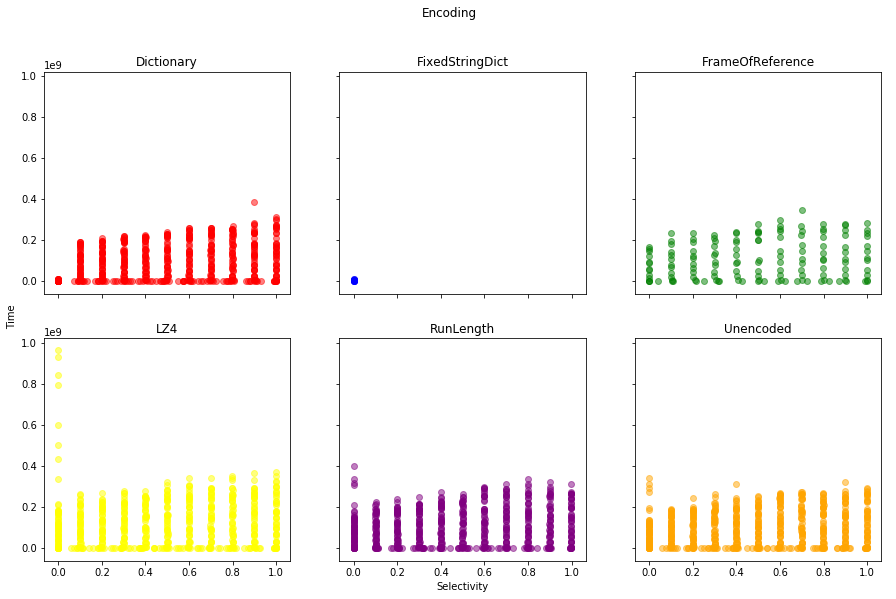

In [61]:
# looking at impact of the datatype

dicts = ohe_data.loc[ohe_data['ENCODING_Dictionary'] == 1]
fsdicts = ohe_data.loc[ohe_data['ENCODING_FixedStringDictionary'] == 1]
forefs = ohe_data.loc[ohe_data['ENCODING_FrameOfReference'] == 1]
lz4s = ohe_data.loc[ohe_data['ENCODING_LZ4'] == 1]
runls = ohe_data.loc[ohe_data['ENCODING_RunLength'] == 1]
noencs = ohe_data.loc[ohe_data['ENCODING_Unencoded'] == 1]

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15,9))
#ax=fig.add_axes([0,0,1,1])
fig.suptitle('Encoding')
axs[0,0].scatter(dicts['SELECTIVITY'], dicts['RUNTIME_NS'], color='r', alpha=0.5)
axs[0, 0].set_title('Dictionary')
axs[0,1].scatter(fsdicts['SELECTIVITY'], fsdicts['RUNTIME_NS'], color='b', alpha=0.5)
axs[0, 1].set_title('FixedStringDict')
axs[0,2].scatter(forefs['SELECTIVITY'], forefs['RUNTIME_NS'], color='g', alpha=0.5)
axs[0, 2].set_title('FrameOfReference')
axs[1,0].scatter(lz4s['SELECTIVITY'], lz4s['RUNTIME_NS'], color='yellow',alpha=0.5)
axs[1, 0].set_title('LZ4')
axs[1,1].scatter(runls['SELECTIVITY'], runls['RUNTIME_NS'], color='purple', alpha=0.5)
axs[1, 1].set_title('RunLength')
axs[1,2].scatter(noencs['SELECTIVITY'], noencs['RUNTIME_NS'], color='orange',alpha=0.5)
axs[1, 2].set_title('Unencoded')

# for labels
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Selectivity")
plt.ylabel("Time")
    
plt.show()


In [ ]:
# lz4 can take really long